In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
data=pd.read_csv('Datasets/crime_data.csv')

In [195]:
data.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Desc', 'Weapon Desc', 'Status Desc', 'LOCATION'],
      dtype='object')

In [288]:
data.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Age Group
0,2022-04-12,2020-10-01,0,19,Mission,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,8,F,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,13400 RANGOON ST,"(5, 10]"
1,2023-01-05,2020-02-01,8,2,Rampart,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,900 N MARIPOSA AV,"(5, 10]"
2,2023-03-21,2020-03-15,12,19,Mission,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,12,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,8500 COLUMBUS AV,"(10, 15]"
3,2023-06-04,2020-07-01,12,20,Olympic,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,7,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1700 S WESTMORELAND AV,"(5, 10]"
4,2022-02-02,2020-02-09,12,11,Northeast,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,30,F,W,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,Adult Other,2800 WAVERLY DR,"(25, 30]"


## Null values

In [11]:
### Check Missing Values In The Dataset

print("Any missing value?", data.isnull().values.any())
data.isnull().sum()

Any missing value? False


Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Desc     0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64

## Victim Sex Distribution in Crime

In [34]:
vict_sex_count=data['Vict Sex'].value_counts()
vict_sex_count

Vict Sex
M    111540
F    105368
X     13618
H        19
Name: count, dtype: int64

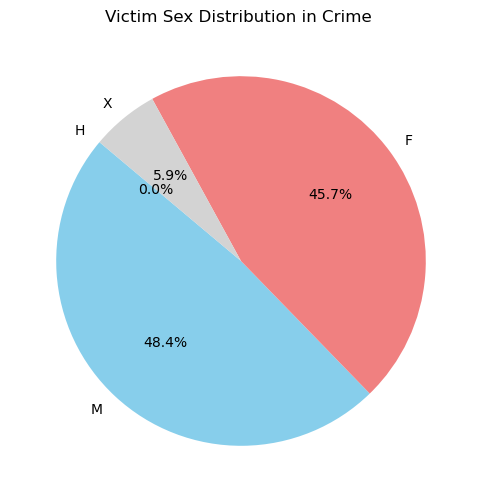

In [251]:
plt.figure(figsize=(8, 6))
plt.pie(vict_sex_count,labels=vict_sex_count.index,autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgray'])
plt.title('Victim Sex Distribution in Crime ')
plt.show()

## Top 10 Locations by Crime

In [308]:
location_count = data['LOCATION'].value_counts().head(10)
location_count

LOCATION
6TH                                       774
800 N  ALAMEDA                      ST    698
7TH                                       696
6TH                          ST           696
7TH                          ST           648
5TH                                       644
HOLLYWOOD                                 576
VERMONT                      AV           543
FIGUEROA                     ST           541
BROADWAY                                  526
Name: count, dtype: int64

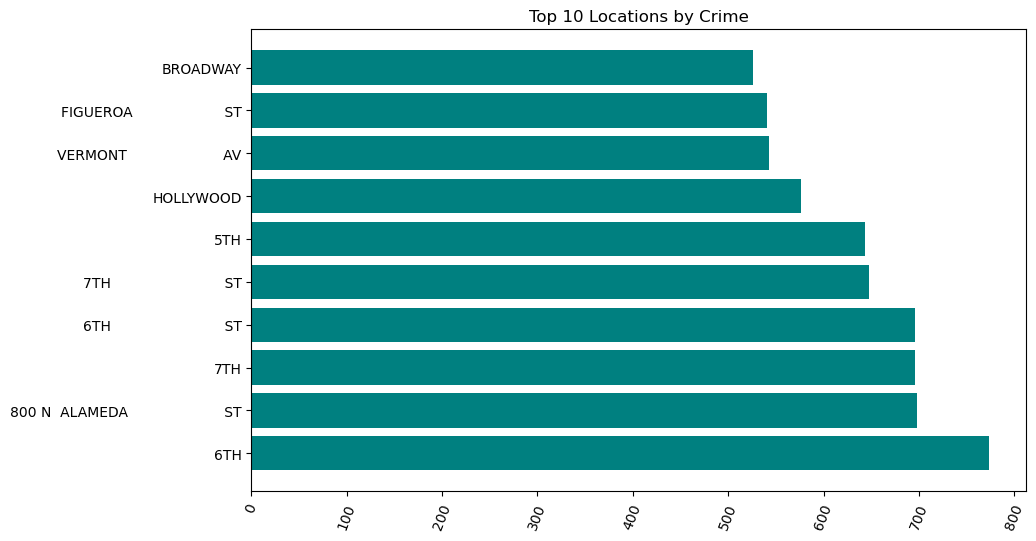

In [368]:
plt.figure(figsize = (10,6))
plt.barh(location_count.index, location_count.values,color='teal')
plt.title('Top 10 Locations by Crime')
plt.xticks(rotation=69)
plt.show()

## Top 10 Weapon Desc

In [315]:
Weapon_Desc_count = data['Weapon Desc'].value_counts().head(10)
Weapon_Desc_count

Weapon Desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    123563
UNKNOWN WEAPON/OTHER WEAPON                        24639
VERBAL THREAT                                      16998
HAND GUN                                           14710
SEMI-AUTOMATIC PISTOL                               5198
KNIFE WITH BLADE 6INCHES OR LESS                    4867
UNKNOWN FIREARM                                     4709
OTHER KNIFE                                         4208
MACE/PEPPER SPRAY                                   2822
VEHICLE                                             2292
Name: count, dtype: int64

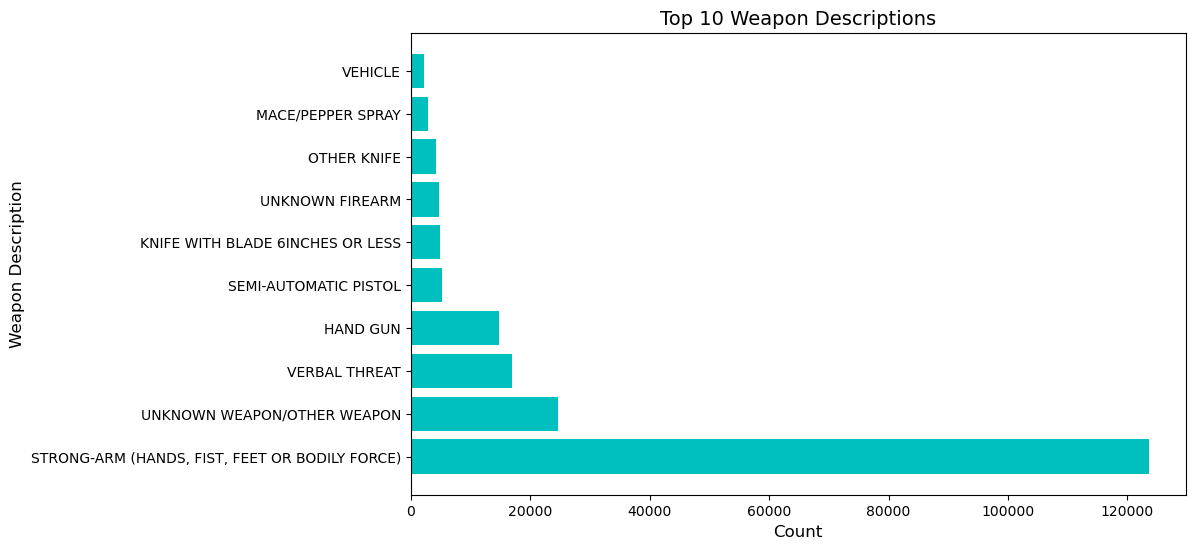

In [360]:
plt.figure(figsize=(10, 6))
plt.barh(Weapon_Desc_count.index, Weapon_Desc_count.values, color='c')

# Adding title and labels
plt.title('Top 10 Weapon Descriptions', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Weapon Description', fontsize=12)

# Show the plot
plt.show()

## Distribution of Victim Ages

In [41]:
vict_age_count=data['Vict Age'].value_counts()
vict_age_count

Vict Age
 0     18492
 30     6496
 31     6021
 28     5977
 27     5943
       ...  
 96       20
 97       16
 95       12
-2         2
-1         1
Name: count, Length: 101, dtype: int64

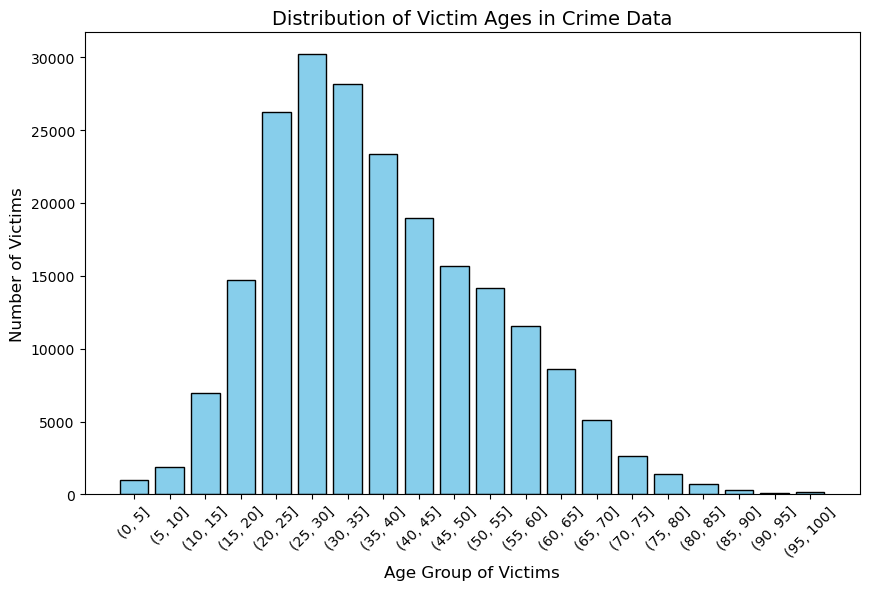

In [257]:
bins = range(0, 101, 5)  # Creating bins in 5-year intervals (0-5, 5-10, ..., 95-100)

# Categorize ages into bins
data['Age Group'] = pd.cut(data['Vict Age'], bins=bins)

age_counts = data['Age Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index.astype(str), age_counts.values, color='skyblue', edgecolor='black')

plt.xlabel('Age Group of Victims', fontsize=12)
plt.ylabel('Number of Victims', fontsize=12)
plt.title('Distribution of Victim Ages in Crime Data', fontsize=14)

plt.xticks(rotation=45, fontsize=10) #for better readability
plt.yticks(fontsize=10) #for better readability

#plt.grid(axis='y', linestyle='--', alpha=0.4) # Adding grid lines only to the y-axis

plt.show()


## Crimes by Time of Day

In [138]:
# data['TIME OCC'] = pd.to_datetime(data['TIME OCC'], format='%H:%M').dt.hour
# crimes_by_time = data.groupby('TIME OCC').size()

data['TIME OCC']


0          0
1          8
2         12
3         12
4         12
          ..
230540     0
230541    14
230542    11
230543    12
230544    10
Name: TIME OCC, Length: 230545, dtype: int32

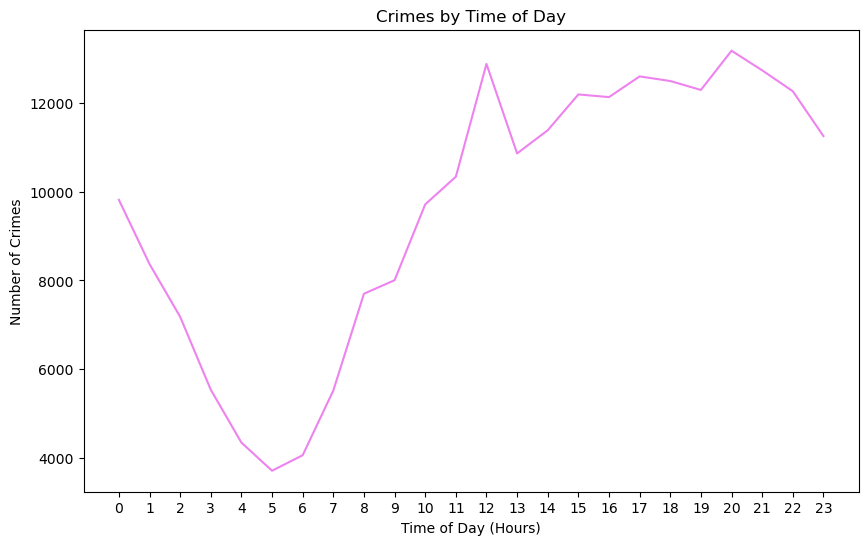

In [282]:
data['TIME OCC'] = pd.to_datetime(data['TIME OCC'], format='%H:%M').dt.hour
crimes_by_time = data.groupby('TIME OCC').size()
plt.figure(figsize=(10, 6))
plt.plot(crimes_by_time.index, crimes_by_time.values, color='violet')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Crimes')
plt.title('Crimes by Time of Day')
plt.xticks(range(0, 24)) 
plt.show()

## Top 10 Areas by Crime

In [62]:
area_counts = data['AREA NAME'].value_counts().head(10)
area_counts

AREA NAME
77th Street    20045
Central        18206
Southeast      15309
Hollywood      14463
Newton         14071
Southwest      13926
Rampart        13229
Olympic        12325
Pacific        10713
Harbor          9386
Name: count, dtype: int64

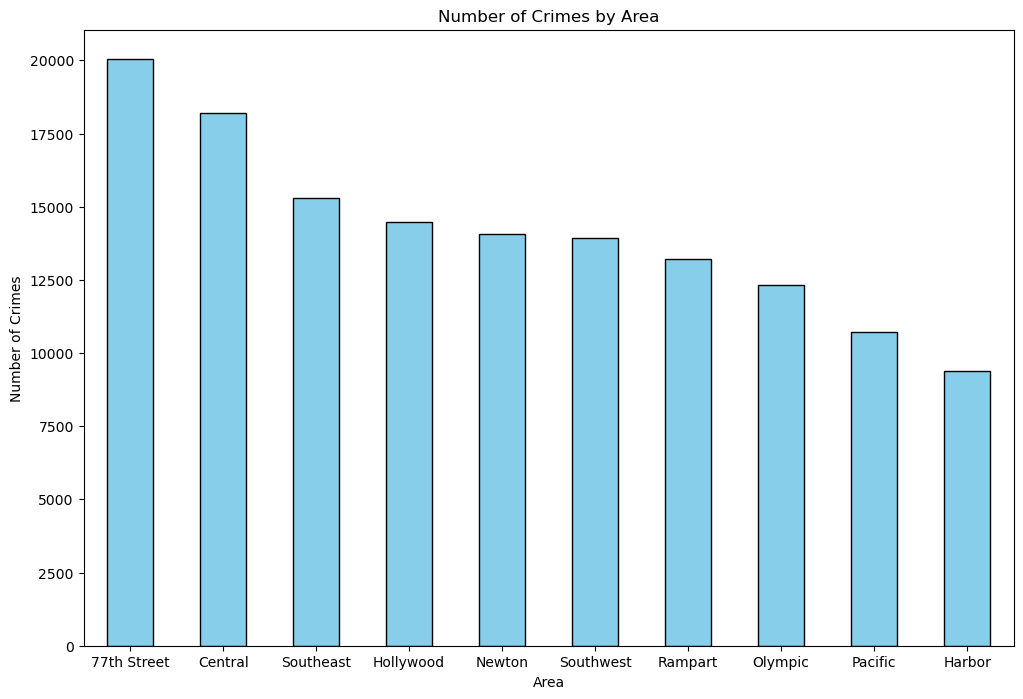

In [95]:
plt.figure(figsize=(12, 8))

area_counts.plot(kind='bar',color='skyblue', edgecolor='black')
plt.title('Number of Crimes by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=360)

#plt.grid(True)
plt.show()

## Number of Crimes by Status Description

In [66]:
status_counts = data['Status Desc'].value_counts()
status_counts

Status Desc
Invest Cont     136954
Adult Other      53802
Adult Arrest     37180
Juv Arrest        1669
Juv Other          938
UNK                  2
Name: count, dtype: int64

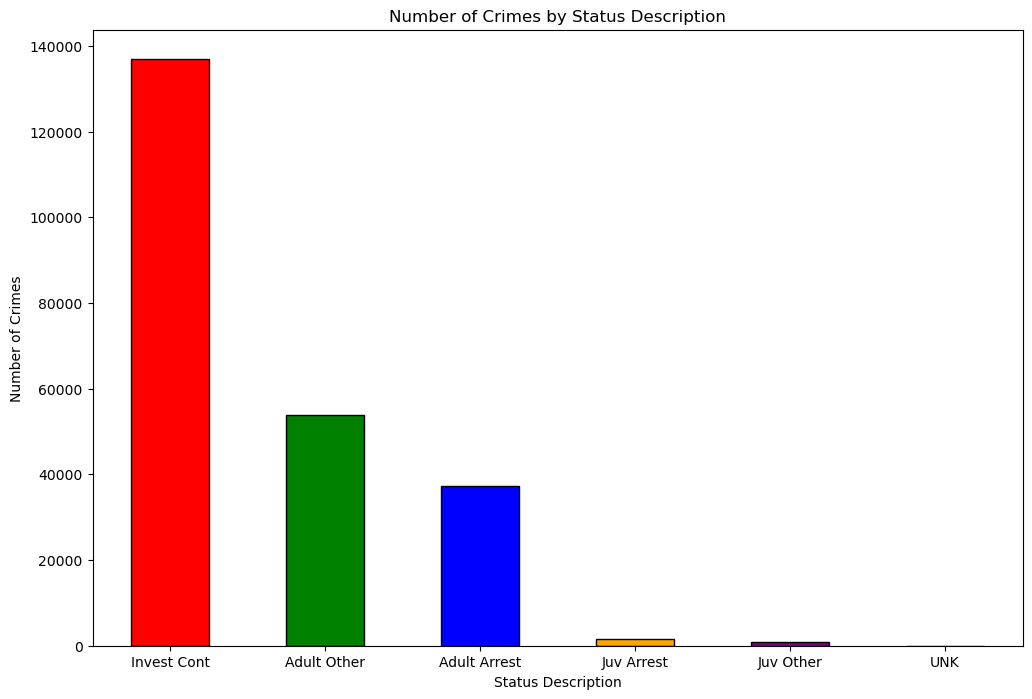

In [91]:
plt.figure(figsize=(12, 8))
c= ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
status_counts.plot(kind='bar',color=c, edgecolor='black')
plt.title('Number of Crimes by Status Description')
plt.xlabel('Status Description')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=360)
#plt.grid(True)
plt.show()


## Number of Incidents Over Time

In [129]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])

incidents_per_day = data['Date Rptd'].value_counts().sort_index()
data['Date Rptd']

0        2022-04-12
1        2023-01-05
2        2023-03-21
3        2023-06-04
4        2022-02-02
            ...    
230540   2023-08-27
230541   2023-07-24
230542   2023-12-15
230543   2023-07-08
230544   2023-03-22
Name: Date Rptd, Length: 230545, dtype: datetime64[ns]

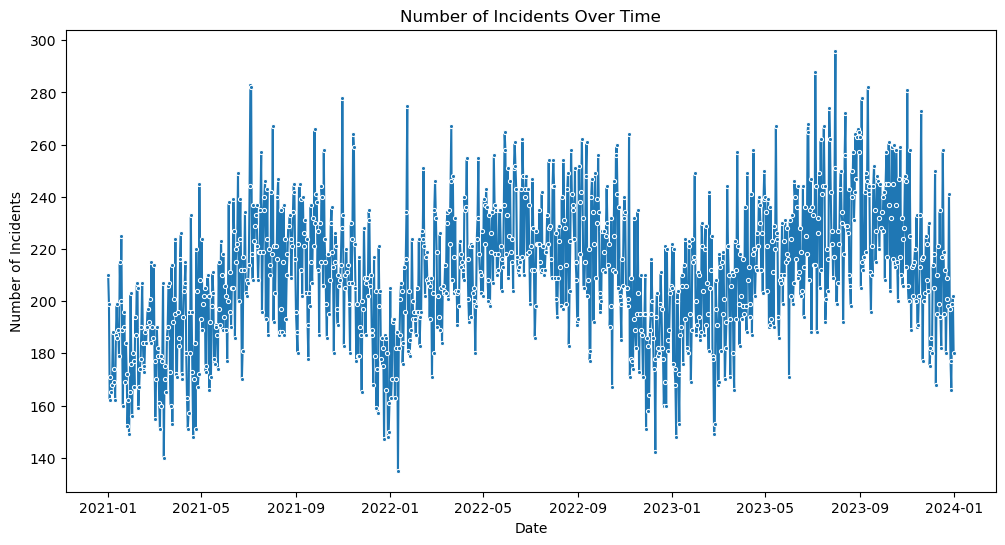

In [131]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=incidents_per_day.index, y=incidents_per_day.values, marker='.')
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
#plt.xticks(rotation=45)
plt.show()

## Histogram of Victim Age

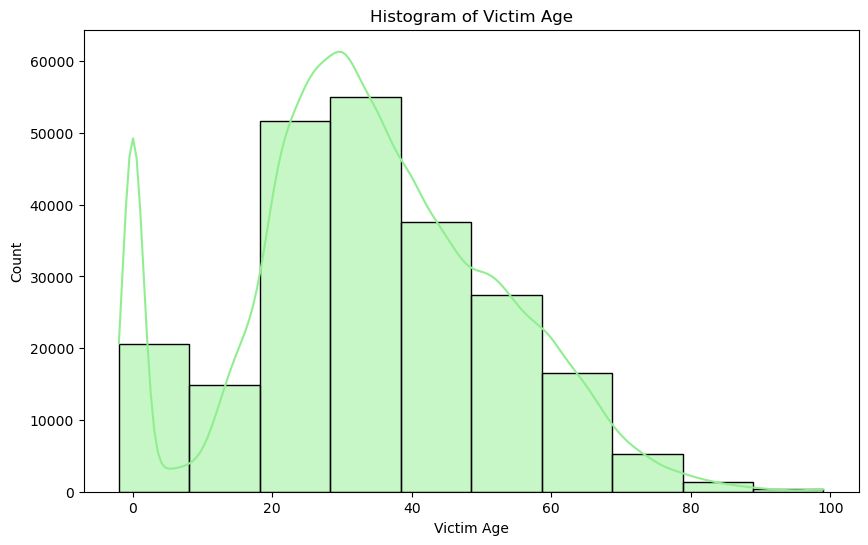

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Vict Age'], bins=10, kde=True, color = 'lightgreen')
plt.title('Histogram of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Count')

plt.show()

## Box Plot of Victim Age by Area

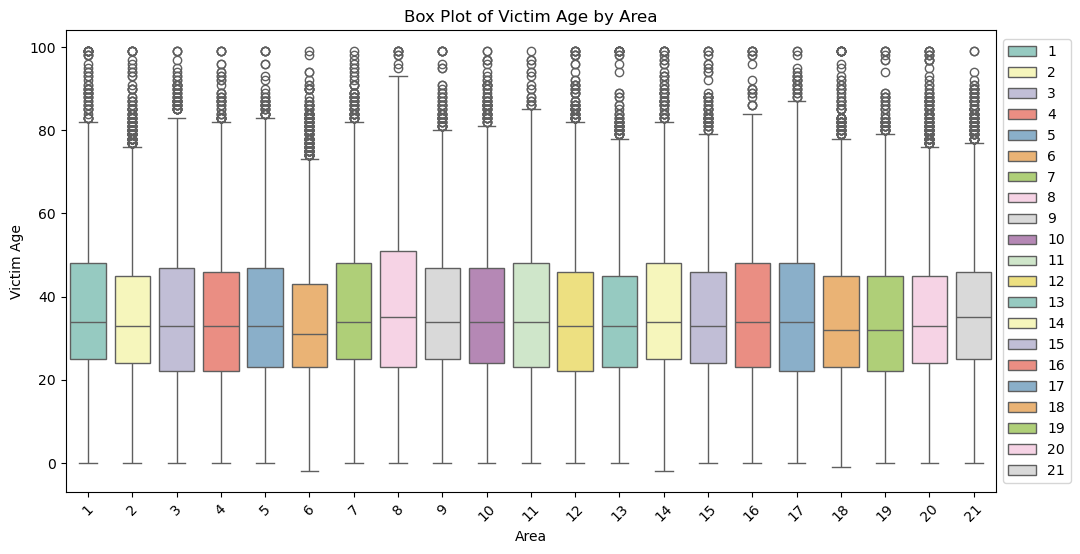

In [210]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='AREA', y='Vict Age', data=data, hue='AREA', palette='Set3')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Box Plot of Victim Age by Area')
plt.xlabel('Area')
plt.ylabel('Victim Age')
plt.xticks(rotation=45)
plt.show()

## Violin Plot of Vict Descent

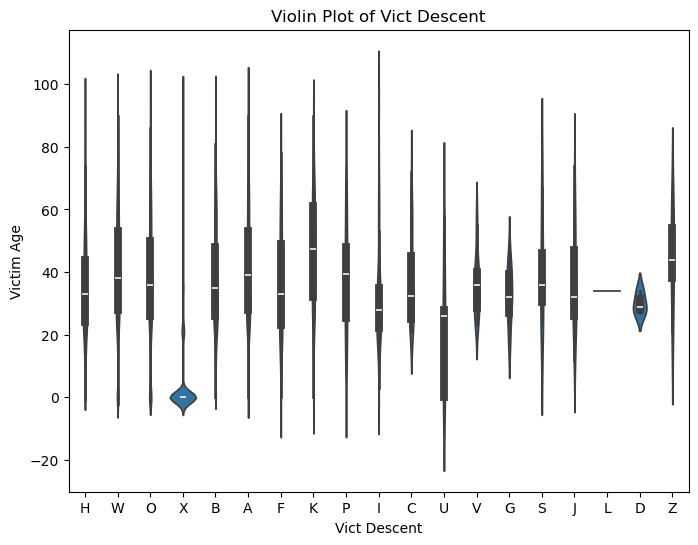

In [243]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Vict Descent', y='Vict Age', data=data)
plt.title('Violin Plot of Vict Descent')
plt.xlabel('Vict Descent')
plt.ylabel('Victim Age')

plt.show()

## Pair Plot of Victim Age, TIME OCC, and Part

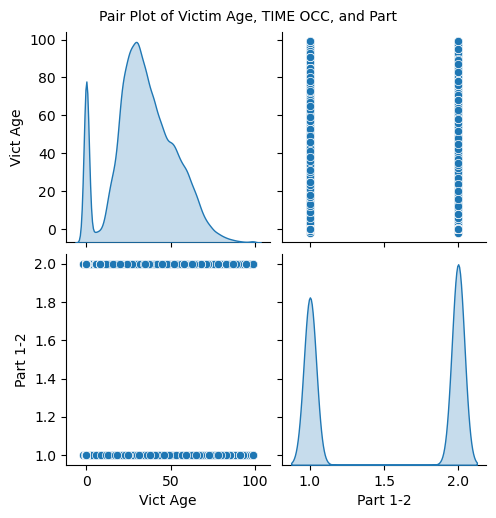

In [248]:
sns.pairplot(data[['Vict Age', 'TIME OCC', 'Part 1-2']], diag_kind='kde')

plt.suptitle('Pair Plot of Victim Age, TIME OCC, and Part', fontsize=10, y=1.02)

plt.show()

## Scatter Plot of Area vs Crime Code

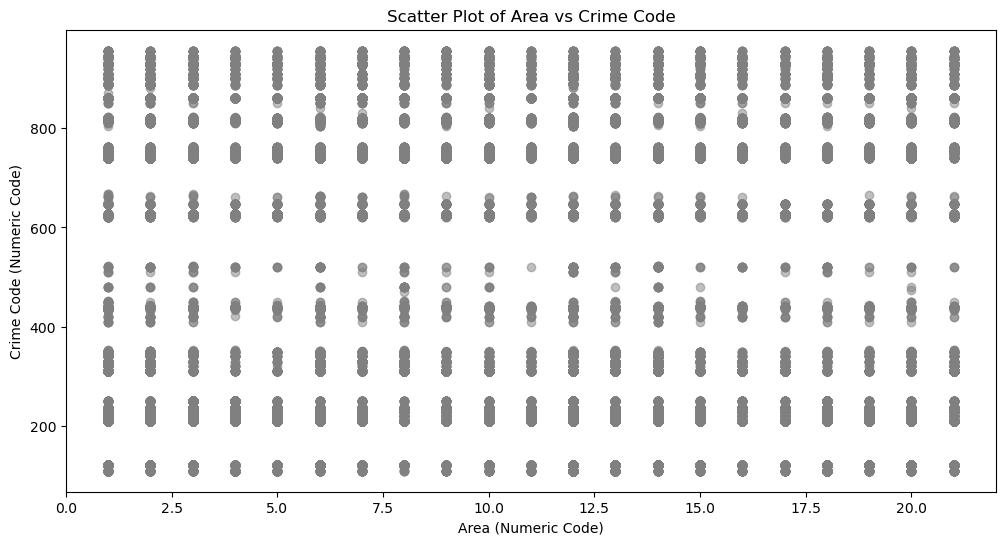

In [270]:
plt.figure(figsize=(12, 6))
plt.scatter(data['AREA'], data['Crm Cd'], alpha=0.5, color = 'grey')

plt.xlabel('Area (Numeric Code)')
plt.ylabel('Crime Code (Numeric Code)')
plt.title('Scatter Plot of Area vs Crime Code')

# Show the plot
plt.show()

## Scatter Plot of Date Rptd vs DATE OCC

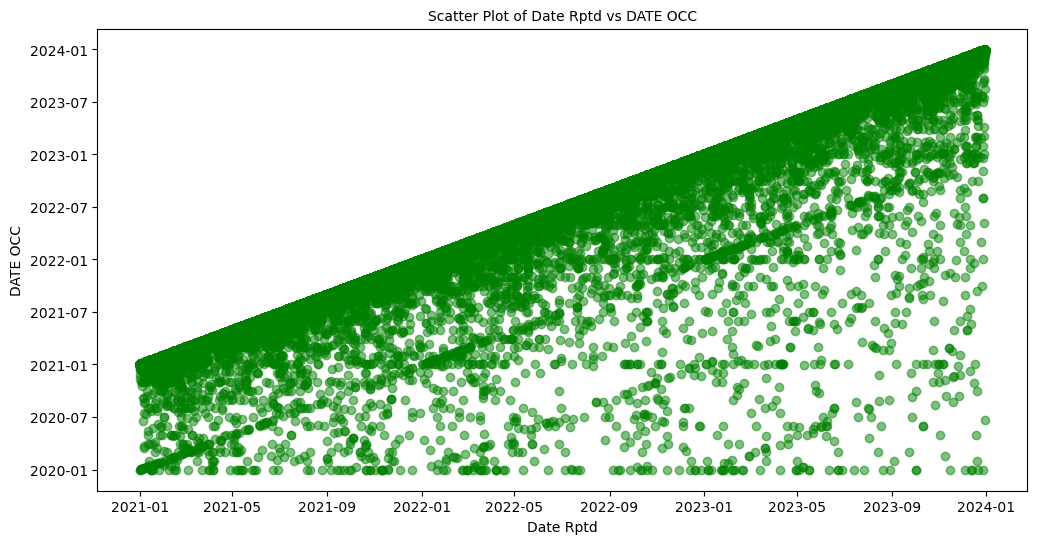

In [279]:
# Ensure the 'Date Rptd' and 'DATE OCC' are in datetime format
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Plot the scatter plot with dates on the x and y axes
plt.figure(figsize=(12, 6))
plt.scatter(data['Date Rptd'], data['DATE OCC'], alpha=0.5, color='g')


plt.xlabel('Date Rptd', fontsize=10)
plt.ylabel('DATE OCC', fontsize=10)
plt.title('Scatter Plot of Date Rptd vs DATE OCC', fontsize=10)


plt.show()
